# PSU DS 200  Fall 2020

## Instructor: Prof. John Yen
## TA: Rupesh Prajapati
## LA: Nathan Tack

# Mini-Project Deliverable 1: Reviews Sentiment Classification and Hyperparameter Tuning

This Jupyter Notebook is for Mini-Project Deliverables #1 for DS 200. 

# 9 Exercises (Total 80 points)

- Exercise 1: 5 points
- Exercise 2: 5 points
- Exercise 3: 5 points
- Exercise 4: 10 points
- Exercise 5: 10 points
- Exercise 6: 10 points
- Exercise 7: 10 points
- Exercise 8: 10 points
- Exercise 9: 15 points

# Due: 10 pm, November 30th

## Acknowledgement: 
The datascience module is developed by University of California Berkeley for its data 8 course.


In [1]:
import datascience
import numpy as np
import graphviz

from datascience import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 


from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.base import ClassifierMixin
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support

import pandas as pd
import numpy as np

from sklearn.externals import joblib

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

/usr/local/lib/python3.6/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.6/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-le

# Mount Google Drive

Like previous labs, we need to first mount the Google Drive in Colab before we can read data from Google Drive.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls /content/drive/My\ Drive/DS200Labs

baby.csv				  IMDB5000movies.csv
BC_10_2					  IMDBReviewsSentiment.csv
BC_10_2.pdf				  IRIS.csv
Ben-NE-9-10-2015-pass-6.csv		  player_data.csv
Ben_Pass_5_2				  salary_data.csv
Ben_Pass_5_2.pdf			  SFSalaries2011_2014.csv
breast-cancer-wisconsin-data-windCSV.csv  station.csv
BreatCancerFinal.csv			  trip.csv
faithful.csv				  Tweets


# Exercise 1 (5 points)

Complete the following code cell to load the csv file IMDBReviewsSentiment.csv from the DS200Labs directory of your Google Drive.

In [4]:
path= "/content/drive/My Drive/DS200Labs/IMDBReviewsSentiment.csv"
reviews = Table.read_table(path)
reviews.show(10)

review,sentiment
One of the other reviewers has mentioned that after watc ...,positive
A wonderful little production. The filming t ...,positive
I thought this was a wonderful way to spend time on a to ...,positive
Basically there's a family where a little boy (Jake) thi ...,negative
"Petter Mattei's ""Love in the Time of Money"" is a visuall ...",positive
"Probably my all-time favorite movie, a story of selfless ...",positive
I sure would like to see a resurrection of a up dated Se ...,positive
"This show was an amazing, fresh & innovative idea in the ...",negative
Encouraged by the positive comments about this film on h ...,negative
If you like original gut wrenching laughter you will lik ...,positive


# Exercise 2 (5 points)

Sample 1000 positive tweets for constructing your predictive model for movie review sentiment analysis.

In [5]:
pos_reviews = reviews.where("sentiment", are.equal_to('positive')).sample(1000, with_replacement = False)
pos_reviews.show(10)

review,sentiment
"Probably my all-time favorite movie, a story of selfless ...",positive
This movie is very good. The screenplay is enchanting. B ...,positive
I have to admit that Holly was not on my watch list for ...,positive
Musings: Pure delight from beginning to end. Not a laugh ...,positive
As the celebration of Christmas has evolved through the ...,positive
Greetings again from the darkness. Stunning photography ...,positive
It's not easy making a movie with 18 different stories i ...,positive
I taped this on Sundance and had no idea that it was a M ...,positive
This 2004 Oscar nominee is a very short b/w film in Span ...,positive
"I started to watch this movie expecting nothing, just an ...",positive


# Add a Classification Column for Positive Reviews

In [6]:
pos_reviews2 = pos_reviews.with_column("classification", 1)
pos_reviews2.show(5)

review,sentiment,classification
"Probably my all-time favorite movie, a story of selfless ...",positive,1
This movie is very good. The screenplay is enchanting. B ...,positive,1
I have to admit that Holly was not on my watch list for ...,positive,1
Musings: Pure delight from beginning to end. Not a laugh ...,positive,1
As the celebration of Christmas has evolved through the ...,positive,1


# Exercise 3 (5 points)

Complete the code cell below to sample 1000 negative reviews.

In [7]:
neg_reviews = reviews.where("sentiment", are.equal_to('negative')).sample(1000, with_replacement=False)
neg_reviews.show(10)

review,sentiment
This movie is pretty predictable nuff said....from the d ...,negative
"River Queen attempts to pack a complicated, sweeping, hi ...",negative
A somewhat dull made for tv movie which premiered on the ...,negative
"As many know, this is the feature film debut of Edward D ...",negative
Happy Go Lovely is a waste of everybody's time and talen ...,negative
Totally brain-dead actioner made in the Philippines. Thi ...,negative
A man (Goffredo Unger) is found floating in the sea amon ...,negative
I really do not joke when i can honestly submit that thi ...,negative
Gritty drama? Emotionally powerful? Blah! The BBC has lo ...,negative
This movie sucked ! They took something from my childhoo ...,negative


# Add the Classification Column for Negative Reviews

In [8]:
neg_reviews2 = neg_reviews.with_column("classification", 0)
neg_reviews2.show(5)

review,sentiment,classification
This movie is pretty predictable nuff said....from the d ...,negative,0
"River Queen attempts to pack a complicated, sweeping, hi ...",negative,0
A somewhat dull made for tv movie which premiered on the ...,negative,0
"As many know, this is the feature film debut of Edward D ...",negative,0
Happy Go Lovely is a waste of everybody's time and talen ...,negative,0


# Add the sampled positive reviews and the sampled negative reviews to form a labelled dataset.

This dataset will be used in this mini-project for creating and evaluating a Decision Tree for sentiment analysis.

In [9]:
data = pos_reviews2.append(neg_reviews2)
data.show(5)

review,sentiment,classification
"Probably my all-time favorite movie, a story of selfless ...",positive,1
This movie is very good. The screenplay is enchanting. B ...,positive,1
I have to admit that Holly was not on my watch list for ...,positive,1
Musings: Pure delight from beginning to end. Not a laugh ...,positive,1
As the celebration of Christmas has evolved through the ...,positive,1


# Exercise 4 (10 points)

(a) Complete the code cell below to extract the review text (under the "review" column") and the classification output (under the "classification" column) for constructing and evaluating decision trees.

(b) Complete the code cell below so that the total number of positive reviews and the total number of negative reviews can be printed.

In [10]:
# Use the data for constructing a Decision Tree Classifier for Review Sentiment
data_X= list(data['review'])
data_Y= list(data['classification'])
pos_count = data.where('classification', are.equal_to(1)).num_rows
neg_count = data.where('classification', are.equal_to(0)).num_rows

print('Data size:', len(data_X))
print('Positive Data Size: ', pos_count)
print('Negative Data Size: ', neg_count)

Data size: 2000
Positive Data Size:  1000
Negative Data Size:  1000


### Stratified KFold Cross Validation
StratifiedKFold is a function in sklearn under the submodule model_selection.
#### Notice: In the beginning of this notebook, we import StratifiedKFold using the following python code:
    from sklearn.model_selection import StratifiedKFold
    
The n_splits parameter of StratifiedKFold indicates how many folds to use.  For example, 
n_splits=5 means Stratified 5-fold cross validation.


# Exercise 5 (10 points)

Complete the following code to specify the number of folds (i.e., k) in Stratified K-fold Cross Validation.

In [11]:
# Use Stratified Kfold Cross Validation so that
#   each fold contains the same ratio of positive/negative instances
k = 10
skf = StratifiedKFold(n_splits= k , random_state= 1, shuffle= True)

# Exercise 6 (10 points)

Complete the following code to specify the range of max_depth for finding the best max_depth for a Decision Tree for Sentiment Classification of Movie Reviews.

In [12]:
### Set the range of max_depth for finding the best max_depth for this problem
low_max_depth = 1
high_max_depth = 15
training_performance_table = np.empty( [high_max_depth+1, k, 5] )
testing_performance_table = np.empty( [high_max_depth+1, k, 5] )

# Exercise 7 (10 points)

Complete the following code cell that (1) transforms the review text in the input data (of a fold) to its word frequency matrix, (2) use the word frequency matrix of training reviews and their corresponding sentiment classification to create a decision tree, (3) evaluate the decision tree created using training data (of the fold), and (4) repeat step 1 to step 3 a total of k times (once for each fold) for each max_depth setting (from the low_max_depth you
specified to high_max_depth you specified).

In [13]:
for depth in range(low_max_depth, high_max_depth+1):

    fold = 0

    for train_index, test_index in skf.split(data_X, data_Y):
        print("Fold Number:", fold)
     #   print("Training Data Index:", train_index)
        print("Testing Data Index:", test_index)  
    
        x_train= list(data.take(train_index)['review'])     
    #    print("Training Data:", x_train)
        y_train= list(data.take(train_index)['classification'])
    #    print("Training Data Target Output:", y_train)
        x_test= list(data.take(test_index)['review'])
    #    print("Testing Data:", x_test)
        y_test= list(data.take(test_index)['classification'])
        print("Testing Data Target Output:", y_test)
    
        count_vect = CountVectorizer(token_pattern='((?:([@#]|[0-9]|[a-z]|[A-Z])+))', analyzer= 'word', min_df=2)
        X_word_vect = count_vect.fit_transform(x_train)
    
        clf = tree.DecisionTreeClassifier(criterion='entropy', random_state = 100, max_depth=depth, \
                                  min_samples_leaf =2)
    
        clf.fit(X_word_vect, y_train)
    
        ### Use the model generated to predict for training data
        predicted_training_y = clf.predict(X_word_vect)
    
        train_p = metrics.precision_score(y_train, predicted_training_y)
        train_r = metrics.recall_score(y_train, predicted_training_y)
        train_f1= metrics.f1_score(y_train, predicted_training_y)
        training_performance_table[depth, fold, 0]=depth
        training_performance_table[depth, fold, 1]=train_p
        training_performance_table[depth, fold, 2]=train_r
        training_performance_table[depth, fold, 3]=train_f1
        print("Max depth is ", depth, "Prediction Performance for Training Data f1:", train_f1)

        ### Use the model generated to predict for testint data
        x_test_word_vect = count_vect.transform(x_test)
        predicted_testing_y = clf.predict(x_test_word_vect)
    
        test_p= metrics.precision_score(y_test, predicted_testing_y)
        test_r= metrics.recall_score(y_test, predicted_testing_y)
        test_f1 = metrics.f1_score(y_test, predicted_testing_y)
        testing_performance_table[depth, fold, 0]=depth
        testing_performance_table[depth, fold, 1]=test_p
        testing_performance_table[depth, fold, 2]= test_r
        testing_performance_table[depth, fold, 3]= test_f1
        print("Prediction Performance for Testing Data f1:", test_f1)
    
        fold=fold+1
    


Fold Number: 0
Testing Data Index: [   9   17   36   42   44   47   51   53   69   75  101  113  122  133
  140  152  154  158  171  181  203  206  219  230  239  241  263  271
  273  282  297  311  317  324  327  350  354  360  365  366  369  385
  387  392  401  407  427  440  447  454  464  465  467  477  488  496
  499  502  503  509  520  524  526  546  567  584  595  604  613  630
  633  642  686  720  732  742  744  752  758  761  765  772  791  823
  854  856  868  870  895  913  921  923  924  931  933  942  959  962
  996  999 1000 1005 1037 1076 1115 1118 1124 1130 1132 1137 1152 1197
 1233 1261 1282 1296 1299 1308 1311 1322 1330 1336 1339 1342 1352 1370
 1371 1378 1387 1390 1392 1409 1427 1443 1448 1473 1479 1492 1519 1520
 1535 1539 1550 1561 1563 1565 1569 1582 1590 1594 1609 1620 1626 1641
 1644 1657 1658 1661 1678 1698 1713 1721 1725 1748 1755 1768 1786 1792
 1802 1806 1807 1808 1818 1822 1828 1829 1836 1842 1881 1888 1901 1904
 1909 1917 1919 1925 1937 1940 1947 1950 1

### Calculate Average, Minimum, and Maximum f1 score across folds 
The first dimension of training_performance_table refers to a specific max_depth value.
The second dimension of training_performance_table refers to the number of a fold (in a k-fold).
The third dimension of training_performance_table saves f1 score in index "3".

For example, the code below returns an array of f1_score for all k folds for max_depth set to 3.

In [14]:
f1_array=training_performance_table[3, 0:k+1:1, 3]
print(f1_array)

[0.73194506 0.73416592 0.74504505 0.73537604 0.74283113 0.72991375
 0.72579186 0.7446518  0.72752044 0.73796296]


#### Numpy offers a convenient way to calculate the average, the minimum, and the maximum value of a given array:
    np.average returns the average of a given array
    np.amin returns the minimum value of a given array
    np.amax regturns the maximum value of a given array

In [15]:
np.average(f1_array)

0.7355204012085641

In [16]:
np.amin(training_performance_table[3, 0:k+1:1, 3])

0.7257918552036198

In [17]:
np.amax(training_performance_table[3, 0:k+1:1, 3])

0.745045045045045

### We want to calculate the average performance across all folds for each max_depth so that we can compare them. 

In [18]:
cv_training_f1_summary = np.empty( [high_max_depth+1, 3])
cv_testing_f1_summary = np.empty( [high_max_depth+1, 3])
first_fold = 0
last_fold = 5+1
for depth in range(low_max_depth, high_max_depth+1):
    train_f1_array = training_performance_table[depth, first_fold:last_fold:1 , 3]
    cv_training_f1_summary[depth, 0] = np.average(train_f1_array)
    cv_training_f1_summary[depth, 1] = np.amin(train_f1_array)
    cv_training_f1_summary[depth, 2] = np.amax(train_f1_array)
    test_f1_array = testing_performance_table[depth, first_fold:last_fold:1, 3]
    cv_testing_f1_summary[depth, 0] = np.average(test_f1_array)
    cv_testing_f1_summary[depth, 1] = np.amin(test_f1_array)
    cv_testing_f1_summary[depth, 2] = np.amax(test_f1_array)

### We want to plot the average of f1 scores (across all k folds) for each max_depth, and compare the average of f1 scores for training data and testing data

In [19]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

In [20]:
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  """Entry point for launching an IPython kernel.


In [21]:
depth=np.linspace(low_max_depth, high_max_depth, high_max_depth-low_max_depth+1)
print(depth)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]


In [22]:
avg_f1_training = cv_training_f1_summary[low_max_depth:high_max_depth+1, 0]
min_f1_training = cv_training_f1_summary[low_max_depth:high_max_depth+1, 1]
avg_f1_testing = cv_testing_f1_summary[low_max_depth:high_max_depth+1, 0]
min_f1_testing = cv_testing_f1_summary[low_max_depth:high_max_depth+1, 1]

## Exercise 8 (10 points)

Complete the following code for plotting average f1 (across k folds) for training data and for plotting average f1 (across k folds) for testing data.

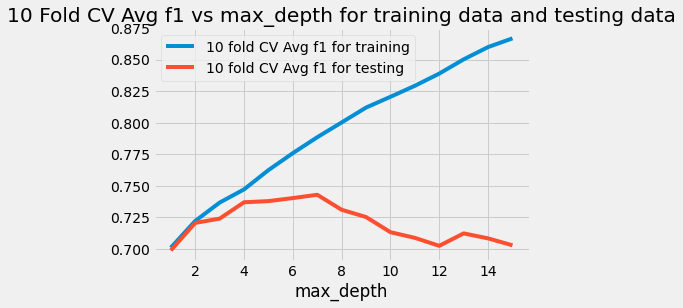

In [23]:
training_avg_f1_label = str(k) + ' fold CV Avg f1 for training'
testing_avg_f1_label = str(k) + ' fold CV Avg f1 for testing'

plt.plot(depth, avg_f1_training, label= training_avg_f1_label)
plt.plot(depth, avg_f1_testing, label= testing_avg_f1_label)
plt.xlabel('max_depth')
plot_title = str(k) + " Fold CV Avg f1 vs max_depth for training data and testing data"
plt.title(plot_title)
plt.legend()
plt.show()

# Exercise 8 (10 points)

Complete the following code for plotting both the average and the minimum f1 score (across k folds) for both training and testing data.

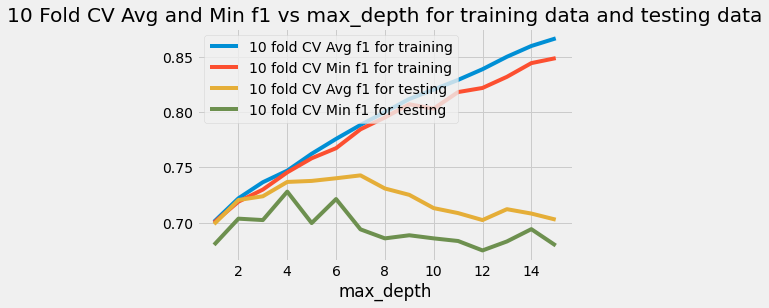

In [24]:
training_min_f1_label = str(k) + ' fold CV Min f1 for training'
testing_min_f1_label = str(k) + ' fold CV Min f1 for testing'

plt.plot(depth, avg_f1_training, label= training_avg_f1_label )
plt.plot(depth, min_f1_training, label= training_min_f1_label )
plt.plot(depth, avg_f1_testing, label= testing_avg_f1_label )
plt.plot(depth, min_f1_testing, label= testing_min_f1_label )
plt.xlabel('max_depth')
plot_title = str(k) + ' Fold CV Avg and Min f1 vs max_depth for training data and testing data'
plt.title(plot_title)
plt.legend()
plt.show()

# Exercise 9 (15 points)

Select the best max_depth based on your analysis above. Provide an explanation of **your** rationale based on your consideration of both prediction performance and reducing risk of overfitting.

# Answer to Exercise 9:
The best max_depth is 4 because the peak appears at 4. We look at the f1 score for min testing data, the avg testing data score does not increase as depth increased, and training data is not used for evaluate models. The model will overfit for large depth values, it will cause the tree perfectly predicts all of the train data and fail to generalize the findings for new data, so we would like to choose the smaller depth to make the model simpler. 